In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline


In [10]:
cancer = load_breast_cancer()
#print(cancer.DESCR)
print(cancer.feature_names)
print(cancer.target_names)
print(cancer.data)
print(cancer.target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    

In [11]:
cancer.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [12]:
type(cancer.data)

numpy.ndarray

In [13]:
cancer.data.shape

(569, 30)

In [14]:
import pandas as pd
raw_data=pd.read_csv('breast-cancer-wisconsin-data.csv',delimiter=',')
raw_data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


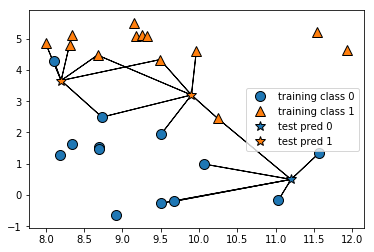

In [15]:
# knn classifier algorithm

mglearn.plots.plot_knn_classification(n_neighbors=6)

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

cancer= load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [17]:
#classification accuracy of knn in classifiation of training and testing set
print('accuracy of knn n - 5, on the training set: {:.3f}'.format(knn.score(x_train,y_train)))
print('accuracy of knn n - 5, on the test set: {:.3f}'.format((knn.score(x_test,y_test))))

accuracy of knn n - 5, on the training set: 0.946
accuracy of knn n - 5, on the test set: 0.916


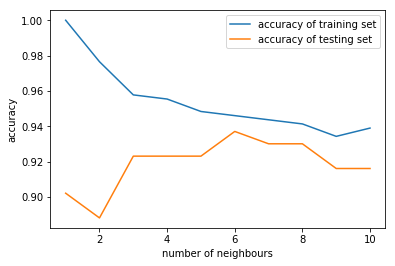

In [24]:
#improve accuracy by focus on number of neighbors yeild best result in term of predition
#trail and error with neighbor 1-10 using loop
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy=[]
test_accuracy=[]

neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train,y_train)
    training_accuracy.append(clf.score(x_train,y_train))
    test_accuracy.append(clf.score(x_test,y_test))
    
    
    
    
    
    
    
plt.plot(neighbors_settings, training_accuracy, label='accuracy of training set')
plt.plot(neighbors_settings,test_accuracy,label='accuracy of testing set')
plt.ylabel('accuracy')
plt.xlabel('number of neighbours')    
plt.legend()






In [25]:
#the algorithm works best for 6 neighbours form the graph thus number of neighbours is calculated
#final output
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
clf=KNeighborsClassifier(n_neighbors=6)
clf.fit(x_train,y_train)

x=clf.predict(x_train)
y=clf.predict(x_test)
j=0
k=0
a=0
b=0
for i in range(len(x_train)):
    if x[i]==1:
        j+=1
    else:
        k+=1

        
        
for i in range(len(x_test)):
    if x[i]==1:
        a+=1
    else:
        b+=1

        

print('accuracy of knn n - 6, on the training set: {:.3f}'.format(clf.score(x_train,y_train)))
print('\ntraining set length',len(x_train))
print('number patients affected(malignant)',k)        
print('number patients not affected(benign)',j)


print('accuracy of knn n - 6, on the test set: {:.3f}'.format((clf.score(x_test,y_test))))
print('\ntesting set length',len(x_test))
print('number patients affected(malignant)',b)        
print('number patients not affected(benign)',a)
print('\nnumber patients affected(malignant)',k+b)        
print('number patients not affected(benign)',j+a)


accuracy of knn n - 6, on the training set: 0.946

training set length 426
number patients affected(malignant) 154
number patients not affected(benign) 272
accuracy of knn n - 6, on the test set: 0.937

testing set length 143
number patients affected(malignant) 52
number patients not affected(benign) 91

number patients affected(malignant) 206
number patients not affected(benign) 363


In [26]:
print(x)


[1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1
 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1
 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1
 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0]


In [27]:
print(cancer.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 